### Construindo um Modelo de Regressão Linear com TensroFlow
Use como conferência o Deep Learning Book: http://www.deeplearningbook.com.br/ 

In [1]:
# importar pacotes
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Definindo os hyperparâmetros do modelo

In [2]:
# hyperparâmetros do modelo
# configuração do modelo

learning_rate = 0.01
training_epochs = 2000
display_step = 200

### Definindo os datasets de treino e de teste
### Considere X com o tamanho de uma casa e Y o preço de uma casa

In [3]:
# dataset de treino
# sempre alimenta um modelo de machine learning com dados históricos
# fazeremos modelo de prevensão, sempre que entregar um tamanho de casa ele vai prever
# o preço da casa

# entrada do tensor x
train_x = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
# saida do tensor y
train_y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])

# treinando o modelo
n_sample = train_x.shape[0]

# dataset de teste
test_x = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])


### Placeholder e variáveis

In [4]:
# placeholders para as variáveis preditoras(x) e para variável target(y)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# pesos e bias do modelo, isto que o modelo aprende peso e bias
w = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

### Construindo o modelo

In [7]:
# construindo o modelo linear, modelo mais simples que existe

# fórmula do modelo linear: y = W*X + b
# durante o treinamento o modelo vai aprendendo o que é w e b
# até chegar na melhor reducao possível até chegar na equação
# linear model - previsão
linear_model = w * x + b

# mean squared error (erro quadrado médio)
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2 * n_sample)

# orimização com gradiente
# calcula derivada apartir do erro e atualiza em próxima especifíca

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(const)

Epoch:   200	 Cost:   0.07991	 w:0.282584	 b:0.5794
Epoch:   400	 Cost:   0.07876	 w:0.275909	 b:0.6267
Epoch:   600	 Cost:   0.07806	 w:0.270674	 b:0.6638
Epoch:   800	 Cost:   0.07762	 w:0.266568	 b:0.6929
Epoch:  1000	 Cost:   0.07736	 w:0.263348	 b:0.7158
Epoch:  1200	 Cost:   0.07719	 w:0.260822	 b:0.7337
Epoch:  1400	 Cost:   0.07709	 w:0.25884	 b:0.7477
Epoch:  1600	 Cost:   0.07703	 w:0.257287	 b:0.7587
Epoch:  1800	 Cost:   0.07699	 w:0.256068	 b:0.7674
Epoch:  2000	 Cost:   0.07697	 w:0.255112	 b:0.7742

Otimização Concluída!
Custo final de Treinamento: 0.07696645 - w Final: 0.2551117 -b Final: 0.7741525 



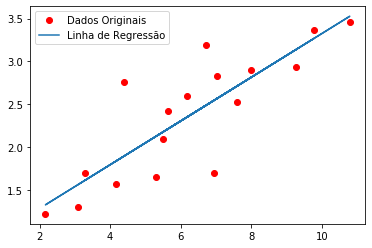

Custo Final em Testes:  0.07762321
Diferença Média Quadrada Absoluta: 0.0006567612


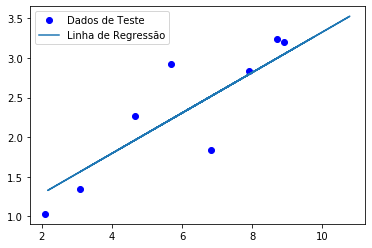

In [8]:
# definindo a inicialização das variáveis
init = tf.global_variables_initializer()

# iniciando sessão
with tf.Session() as sess:
    # Iniciando as varáveis
    sess.run(init)
    # Treinamento do modelo
    for epoch in range(training_epochs):
        # Otimização com Gradiente Descent
        sess.run(optimizer, feed_dict={x: train_x, y: train_y})
        
        # Display de cada epoch
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={x: train_x, y: train_y})
            print('Epoch:{0:6}\t Cost:{1:10.4}\t w:{2:6.6}\t b:{3:6.4}'.format(epoch+1, c, sess.run(w), sess.run(b)))
            
    # Imprimindo os paâmetros finais do modelo
    print('\nOtimização Concluída!')
    training_cost = sess.run(cost, feed_dict={x: train_x, y: train_y})
    print('Custo final de Treinamento:', training_cost, '- w Final:', sess.run(w), '-b Final:', sess.run(b), '\n')

    # Visualizando o resultado
    plt.plot(train_x, train_y, 'ro', label='Dados Originais')
    plt.plot(train_x, sess.run(w) * train_x + sess.run(b), label='Linha de Regressão')
    plt.legend()
    plt.show()
    
    # Testando o modelo
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_x.shape[0]), 
                           feed_dict={x: test_x, y: test_y})
    
    print('Custo Final em Testes: ', testing_cost)
    print('Diferença Média Quadrada Absoluta:', abs(training_cost - testing_cost))
    
    # Display em Teste
    plt.plot(test_x, test_y, 'bo', label='Dados de Teste')
    plt.plot(train_x, sess.run(w) * train_x + sess.run(b), label='Linha de Regressão')
    plt.legend()
    plt.show()
    
sess.close()

Cost está abaixando a cada passada ou seja a taxa de erro vai diminuindo de acordo com o treinamento do algoritmo.
Agora temos uma formúla y = w * x + b

## Fim